In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

original_df = pd.read_csv('../data/all_financial_with_keywords.csv')

### Prep Target Column
def prep_target_variable(original_df, column='diff'):
    # Convert to percent based deltas
    original_df['open'] = original_df[column] + original_df['close']
    original_df['diff_percent'] = original_df[column] / original_df['close']
    
   # Remove the over 100% change values
    final_df = original_df[(original_df['diff_percent'] > -1.0) & (original_df['diff_percent'] < 1.0)]
    return final_df

original_df = prep_target_variable(original_df)
target_column = 'diff_percent'

### Setup Keyword Column Group and Dataframe
keyword_columns = [
    'technology', 'software', 'ai', 'machine learning', 'cloud', 'saas', 
    'platform', 'digital', 'data', 'analytics', 'algorithm', 'automation', 
    'blockchain', 'cryptocurrency', 'cybersecurity', 'subscription', 'recurring',
    'e-commerce', 'mobile', 'app', 'virtual', 'healthcare', 'biotech', 
    'pharmaceutical', 'medical', 'clinical', 'energy', 'renewable', 'solar', 
    'electric', 'battery', 'real estate', 'logistics', 'transportation', 
    'automotive', target_column
]
keyword_df = original_df[keyword_columns]
keyword_df.head()

,technology,software,ai,machine learning,cloud,saas,platform,digital,data,analytics,algorithm,automation,blockchain,cryptocurrency,cybersecurity,subscription,recurring,e-commerce,mobile,app,virtual,healthcare,biotech,pharmaceutical,medical,clinical,energy,renewable,solar,electric,battery,real estate,logistics,transportation,automotive,diff_percent
0,5,2,0,0,1,0,19,3,42,0,0,0,0,0,5,3,1,0,0,0,0,0,0,0,4,0,18,0,0,1,0,7,0,0,1,0.029333
1,26,5,0,0,3,0,4,14,11,0,0,0,4,0,0,4,6,3,26,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,-0.002051
2,26,5,0,0,3,0,4,14,11,0,0,0,4,0,0,4,6,3,26,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0.000000
3,71,4,0,0,4,0,1,14,144,0,0,1,0,0,0,1,15,0,0,0,1,0,0,0,0,0,2,2,0,1,1,7,0,2,0,0.004995
4,33,9,12,0,2,0,8,4,10,3,0,9,0,0,5,2,2,2,0,0,0,0,0,0,3,0,6,0,0,17,2,1,0,29,8,-0.007323


# Group 2: Keyword Count Data

This is the count of keywords found in a IPO prospectus document.

## Cleaning

Data is not missing any values and all data types are int64, which makes sense for count data. No dupes either.

In [4]:
keyword_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2024
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   technology        2017 non-null   int64  
 1   software          2017 non-null   int64  
 2   ai                2017 non-null   int64  
 3   machine learning  2017 non-null   int64  
 4   cloud             2017 non-null   int64  
 5   saas              2017 non-null   int64  
 6   platform          2017 non-null   int64  
 7   digital           2017 non-null   int64  
 8   data              2017 non-null   int64  
 9   analytics         2017 non-null   int64  
 10  algorithm         2017 non-null   int64  
 11  automation        2017 non-null   int64  
 12  blockchain        2017 non-null   int64  
 13  cryptocurrency    2017 non-null   int64  
 14  cybersecurity     2017 non-null   int64  
 15  subscription      2017 non-null   int64  
 16  recurring         2017 non-null   int64  
 17  

## Distribution

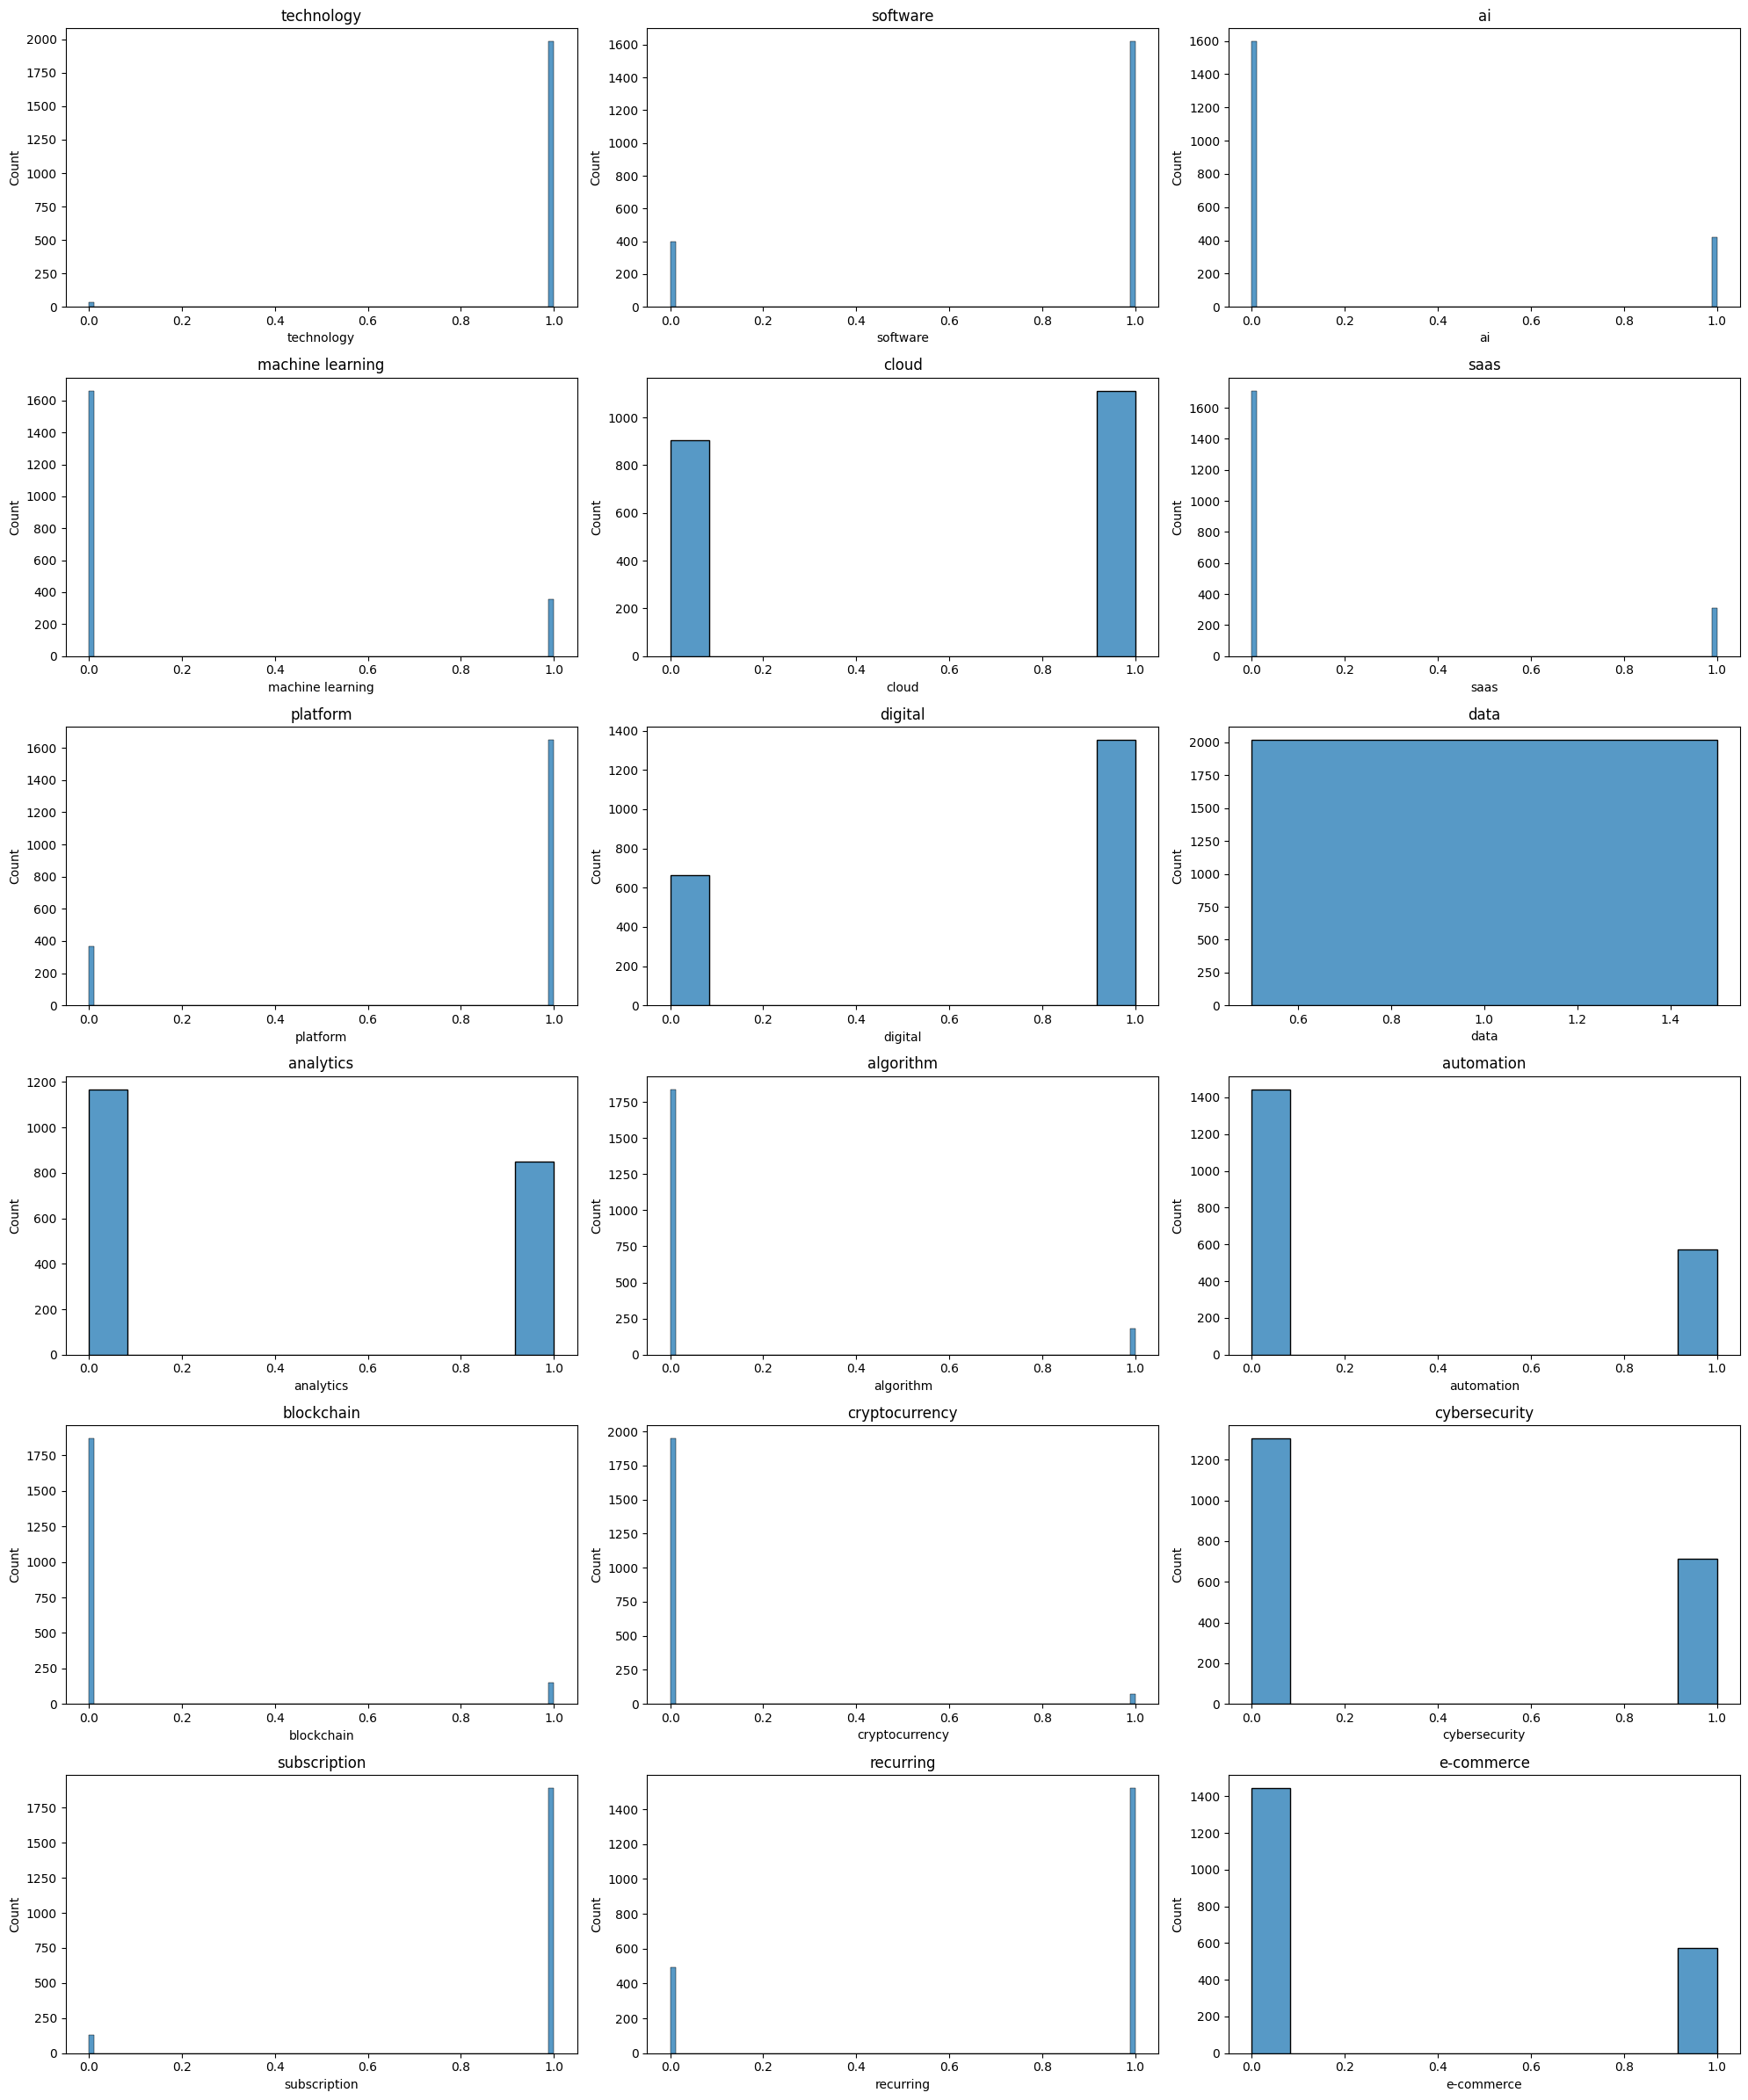

In [18]:
### View Distributions
cols=keyword_df.columns
n = len(cols)
df = (keyword_df > 0).astype(int)

n_rows = 6
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 24))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
mean = keyword_df.mean()
variance = keyword_df.var()
(mean, variance)

(technology          54.166088
 software            26.360932
 ai                   4.224095
 machine learning     1.022310
 cloud                8.015865
 saas                 1.650967
 platform            36.041646
 digital             18.006941
 data                87.501735
 analytics            3.381755
 algorithm            0.362915
 automation           1.707982
 blockchain           1.484879
 cryptocurrency       0.838870
 cybersecurity        3.112543
 subscription        11.671294
 recurring            6.535944
 e-commerce           3.726326
 mobile               7.250372
 app                  2.687159
 virtual              2.556272
 healthcare          22.449182
 biotech              1.097174
 pharmaceutical      10.396133
 medical             21.401587
 clinical            75.173525
 energy              13.422410
 renewable            1.909767
 solar                3.253842
 electric             2.935548
 battery              1.550322
 real estate         17.399603
 logisti